# Olfactory Transduction Library

### Table of Content

1. Estimating Binding & Dissociation Rate From Data (_Main Entry Point_)
2. Computing F-I curve of BSG
3. Computing Resting Spike Rate of BSG
4. Computing Peak and Stead-State Output of OTP under Step Input
5. Computing Peak and Stead-State Output of OTP-BSG under Step Input
6. Working with other FlyBrainLab Packages

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# 1. Estimating Binding & Dissociation Rates from Data

In [3]:
from olftrans import olftrans
from olftrans import data

In [4]:
data.HallemCarlson.DATA

OR,2a,7a,9a,10a,19a,22a,23a,33b,35a,43a,...,59b,65a,67a,67c,82a,85a,85b,85f,88a,98a
ammonium hydroxide,11,0,35,24,30,17,7,16,21,20,...,7,21,27,16,18,8,28,24,26,36
putrescine,14,0,29,0,20,16,7,21,17,4,...,4,16,7,12,12,1,37,15,20,29
cadaverine,9,0,24,0,24,17,2,18,29,11,...,9,17,3,20,14,3,42,23,26,33
g-butyrolactone,17,51,56,8,22,47,13,32,98,9,...,18,24,136,26,9,6,60,30,28,41
g-hexalactone,23,0,121,32,27,144,21,50,188,29,...,20,36,58,46,21,11,66,61,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethyl decanoate,13,5,5,57,12,10,8,26,7,13,...,5,14,4,3,12,0,41,5,21,24
ethyl trans-2-butenoate,19,15,106,160,38,214,18,21,31,0,...,0,20,115,40,32,105,93,31,17,255
ethyl lactate,47,48,78,45,53,74,20,27,22,28,...,135,49,50,294,58,53,90,84,19,78
diethyl succinate,24,6,24,1,53,209,35,17,0,13,...,0,23,186,13,48,2,48,19,31,16


In [9]:
spike_rates = data.HallemCarlson.DATA[~data.HallemCarlson.DATA.isna()].values
hallem_carlson_est = olftrans.estimate(amplitude=100., resting_spike_rate=8., steady_state_spike_rate=spike_rates, decay_time=0.1)

/mnt/server-home/tingkai/Project/FBL/olftrans/olftrans/olftrans.py:124: RuntimeWarning: invalid value encountered in power
  res = np.atleast_1d(np.power(c*(y-b)/(a-(y-b)), 1./n))


In [10]:
hallem_carlson_affs = data.HallemCarlson.DATA.copy()
hallem_carlson_affs[~hallem_carlson_affs.isna()] = hallem_carlson_est.affs
hallem_carlson_affs

OR,2a,7a,9a,10a,19a,22a,23a,33b,35a,43a,...,59b,65a,67a,67c,82a,85a,85b,85f,88a,98a
ammonium hydroxide,1.156722e-04,1.000000e-08,2.094772e-03,9.766312e-04,0.001503,5.212537e-04,1.000000e-08,0.000443,8.016209e-04,7.467411e-04,...,1.000000e-08,0.000802,1.209416e-03,4.432746e-04,0.000604,1.000000e-08,0.001302,9.766312e-04,0.001120,0.002195
putrescine,3.017767e-04,1.000000e-08,1.399456e-03,1.000000e-08,0.000747,4.432746e-04,1.000000e-08,0.000802,5.212537e-04,1.000000e-08,...,1.000000e-08,0.000443,1.000000e-08,1.767931e-04,0.000177,1.000000e-08,0.002298,3.701776e-04,0.000747,0.001399
cadaverine,1.071630e-05,1.000000e-08,9.766312e-04,1.000000e-08,0.000977,5.212537e-04,1.000000e-08,0.000604,1.399456e-03,1.156722e-04,...,1.071630e-05,0.000521,1.000000e-08,7.467411e-04,0.000302,1.000000e-08,0.002887,9.165147e-04,0.001120,0.001867
g-butyrolactone,5.212537e-04,4.479509e-03,5.779083e-03,1.000000e-08,0.000858,3.651085e-03,2.372977e-04,0.001740,1.000000e+01,1.071630e-05,...,6.035361e-04,0.000977,1.000000e+01,1.120098e-03,0.000011,1.000000e-08,0.006760,1.502852e-03,0.001302,0.002757
g-hexalactone,9.165147e-04,1.000000e-08,1.000000e+01,1.740122e-03,0.001209,1.000000e+01,8.016209e-04,0.004255,1.000000e+01,1.399456e-03,...,7.467411e-04,0.002195,6.247649e-03,3.468435e-03,0.000802,1.156722e-04,0.009254,7.034143e-03,0.001399,0.002195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethyl decanoate,2.372977e-04,1.000000e-08,1.000000e-08,6.008249e-03,0.000177,5.923243e-05,1.000000e-08,0.001120,1.000000e-08,2.372977e-04,...,1.000000e-08,0.000302,1.000000e-08,1.000000e-08,0.000177,1.000000e-08,0.002757,1.000000e-08,0.000802,0.000977
ethyl trans-2-butenoate,6.902767e-04,3.701776e-04,1.000000e+01,1.000000e+01,0.002405,1.000000e+01,6.035361e-04,0.000802,1.618735e-03,1.000000e-08,...,1.000000e-08,0.000747,1.000000e+01,2.631664e-03,0.001740,1.000000e+01,0.125560,1.618735e-03,0.000521,10.000000
ethyl lactate,3.651085e-03,3.842622e-03,1.828009e-02,3.307855e-03,0.004974,1.408008e-02,7.467411e-04,0.001209,8.581956e-04,1.302476e-03,...,1.000000e+01,0.004044,4.254832e-03,1.000000e+01,0.006248,4.974075e-03,0.063179,3.236807e-02,0.000690,0.018280
diethyl succinate,9.766312e-04,1.000000e-08,9.766312e-04,1.000000e-08,0.004974,1.000000e+01,2.094772e-03,0.000521,1.000000e-08,2.372977e-04,...,1.000000e-08,0.000917,1.000000e+01,2.372977e-04,0.003843,1.000000e-08,0.003843,6.902767e-04,0.001619,0.000443


In [ ]:
hallem_carlson_affs = data.HallemCarlson.DATA.copy()
hallem_carlson_affs[~hallem_carlson_affs.isna()] = hallem_carlson_est.affs
hallem_carlson_affs

# 2. Running OTP-BSG Cascade

# 2. Computing Resting Spike Rate of BSG

In [38]:
from olftrans.neurodriver import model as nd

dt = 1e-5
repeat = 50
sigmas = np.linspace(0,0.007,100)
_, rest_fs = nd.compute_resting(
    nd.NoisyConnorStevens, 'sigma', sigmas/np.sqrt(dt), dt=dt, dur=2.,
    repeat=repeat, save=True, smoothen=True, savgol_window=31, savgol_order=4
)

Resting Spike Rate NoisyConnorStevens - Against sigma: Number of NoisyConnorStevens: 5000
Resting Spike Rate NoisyConnorStevens - Against sigma: Number of Input: {'I': 5000}


Resting Spike Rate NoisyConnorStevens - Against sigma:   0%|          | 973/200000 [00:00<00:20, 9726.11it/s]

Compilation of executable circuit completed in 0.9522390365600586 seconds


Resting Spike Rate NoisyConnorStevens - Against sigma: 100%|██████████| 200000/200000 [00:26<00:00, 7635.25it/s]


In [39]:
target_resting_rate = 8. # Hz
target_sigma = np.interp(target_resting_rate, xp=rest_fs, fp=sigmas)

Text(0, 0.5, 'Spike Rate [$Hz$]')

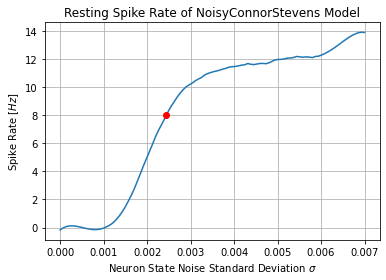

In [40]:
%matplotlib inline
plt.figure()
plt.plot(sigmas, rest_fs)
plt.plot(target_sigma, target_resting_rate, 'ro')
plt.grid()
plt.title('Resting Spike Rate of NoisyConnorStevens Model')
plt.xlabel('Neuron State Noise Standard Deviation $\sigma$')
plt.ylabel('Spike Rate [$Hz$]')

# 3. Computing BSG F-I Curve

In [41]:
from olftrans import data

In [42]:
from olftrans.neurodriver import model as nd

dt = 1e-5
repeat = 50
Is = np.linspace(0,150,150)
sigma = 0.0024413599558694506
_, fs = nd.compute_fi(
    nd.NoisyConnorStevens, Is, dt=dt, dur=3., 
    repeat=repeat, save=True,
    neuron_params={'sigma':sigma/np.sqrt(dt)}
)

F-I NoisyConnorStevens: Number of NoisyConnorStevens: 7500
F-I NoisyConnorStevens: Number of Input: {'I': 7500}


F-I NoisyConnorStevens:   0%|          | 971/300000 [00:00<00:30, 9708.94it/s]

Compilation of executable circuit completed in 1.1393799781799316 seconds


F-I NoisyConnorStevens: 100%|██████████| 300000/300000 [00:44<00:00, 6670.95it/s]


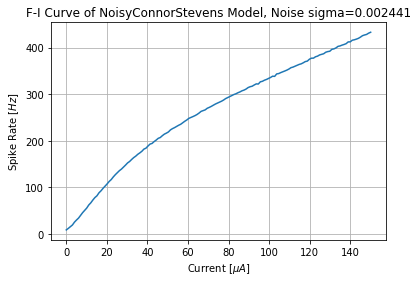

In [43]:
%matplotlib inline
plt.figure()
plt.plot(Is, fs)
plt.grid()
plt.title(f'F-I Curve of NoisyConnorStevens Model, Noise sigma={sigma:.6f}')
plt.xlabel('Current [$\mu A$]')
plt.ylabel('Spike Rate [$Hz$]')
plt.show()

# 4. Computing Peak and Steady State Response of OTP

In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
from olftrans.neurodriver import model as nd

dt = 1e-5
brs = 10**np.linspace(-2, 4, 100)
drs = 10**np.linspace(-2, 4, 100)
amplitude = 100.
_,_,I_ss,I_peak = nd.compute_peak_ss_I(brs, drs, dt=dt, dur=4., start=0.5, save=True, amplitude=amplitude)

OTP Currents: Number of OTP: 10000
OTP Currents: Number of Input: {'conc': 10000}


OTP Currents:   0%|          | 1000/400000 [00:00<00:50, 7926.57it/s]

Compilation of executable circuit completed in 0.8145713806152344 seconds


OTP Currents: 100%|██████████| 400000/400000 [01:03<00:00, 6272.69it/s]


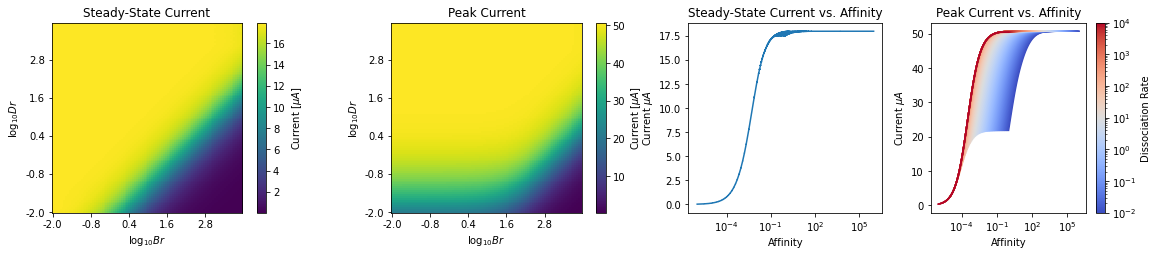

In [33]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import ticker

fig, axes = plt.subplots(1,4,figsize=(20,3.5), gridspec_kw={'width_ratios':[1.5,1.5,1,1]})
cax = axes[0].imshow(I_ss, origin='lower', interpolation='none')
plt.colorbar(cax, ax=axes[0], label='Current [$\mu A$]')
axes[0].set_title('Steady-State Current')
cax = axes[1].imshow(I_peak, origin='lower', interpolation='none')
plt.colorbar(cax, ax=axes[1], label='Current [$\mu A$]')
axes[1].set_title('Peak Current')
@ticker.FuncFormatter
def x_formatter(x, pos):
    _x = np.interp(x, xp=np.arange(len(brs)), fp=brs)
    return f"{np.log10(_x):.1f}"

@ticker.FuncFormatter
def y_formatter(x, pos):
    _x = np.interp(x, xp=np.arange(len(drs)), fp=drs)
    return f"{np.log10(_x):.1f}"

axes[0].xaxis.set_major_formatter(x_formatter)
axes[0].yaxis.set_major_formatter(y_formatter)
axes[1].xaxis.set_major_formatter(x_formatter)
axes[1].yaxis.set_major_formatter(y_formatter)
axes[0].set_xlabel('$\log_{10}Br$')
axes[0].set_ylabel('$\log_{10}Dr$')
axes[1].set_xlabel('$\log_{10}Br$')
axes[1].set_ylabel('$\log_{10}Dr$')

DR,BR = np.meshgrid(drs, brs)
affs = (BR/DR).ravel()

I_ss_flat = I_ss.ravel()
idx = np.argsort(affs)
axes[2].semilogx(affs[idx], I_ss_flat[idx])
axes[2].set_title('Steady-State Current vs. Affinity')
axes[2].set_xlabel('Affinity')
axes[2].set_ylabel('Current $\mu A$')

colors = plt.cm.get_cmap('coolwarm', len(drs))
for n_d, d in enumerate(drs):
    axes[3].semilogx((BR/DR)[:,n_d], I_peak[:,n_d], '-', c=colors(n_d))
axes[3].set_title('Peak Current vs. Affinity')
axes[3].set_xlabel('Affinity')
axes[3].set_ylabel('Current $\mu A$')

norm = mpl.colors.LogNorm(vmin=drs.min(), vmax=drs.max())
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.coolwarm),
             ax=axes[3], orientation='vertical', label='Dissociation Rate')
fig.show()

## 4.1 Infer Mapping from Affinity -> Steady-State Spike-Rate

In [75]:
from scipy.optimize import differential_evolution

In [76]:
affs_intp = 10**np.linspace(-6,3,1000)
I_ss_flat = I_ss.ravel()
idx = np.argsort(affs)
ss_intp = np.interp(affs_intp, affs[idx], I_ss_flat[idx])
hill_f = lambda x, a,b,c,n: b + a*x**n/(x**n+c)
def cost(x, aff, ss):
    a,b,c,n = x
    pred = hill_f(aff,a,b,c,n)
    return np.linalg.norm(pred-ss)
bounds = [(0,100), (0, 100), (0,100), (.5, 2.)]
diffeq_ss = differential_evolution(cost, bounds, tol=1e-4, args=(affs_intp, ss_intp), disp=False)

In [36]:
def inverse_hill_f(y,a,b,c,n, x_ref):
    res = np.power(c*(y-b)/(a-(y-b)), 1./n)
    res[y<b] = x_ref.min()
    res[(y-b) > a] = x_ref.max()
    return res

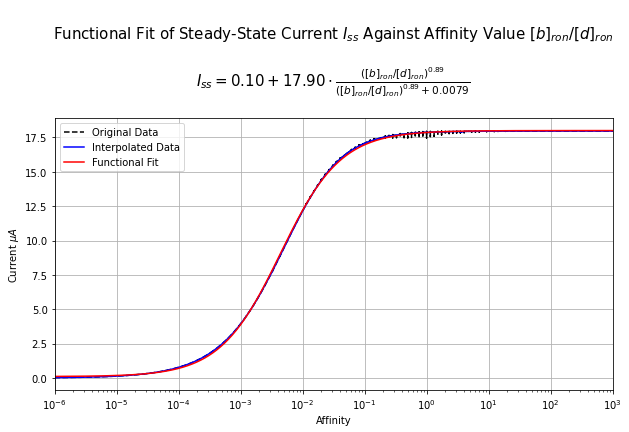

In [37]:
a,b,c,n = diffeq_ss.x
plt.figure(figsize=(10,5))
plt.semilogx(affs[idx], I_ss_flat[idx], '--k',label='Original Data')
plt.semilogx(affs_intp, ss_intp, '-b',label='Interpolated Data')
plt.semilogx(affs_intp, hill_f(affs_intp, *diffeq_ss.x), '-r',label='Functional Fit')
plt.grid()
plt.legend()
plt.xlabel('Affinity')
plt.ylabel('Current $\mu A$')
plt.title(f'''
Functional Fit of Steady-State Current $I_{{ss}}$ Against Affinity Value $[b]_{{ron}}/[d]_{{ron}}$ \n
$I_{{ss}} = {b:.2f} + {a:.2f}\\cdot\\frac{{([b]_{{ron}}/[d]_{{ron}})^{{{n:.2f}}}}}{{([b]_{{ron}}/[d]_{{ron}})^{{{n:.2f}}} + {c:.4f}}}$
''', fontsize=15)
plt.xlim([1e-6, 1e3])
fig.show()

# 5. Computing Peak and Steady State Response of OTP-BSG Cascade

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from olftrans.neurodriver import model as nd

dt = 8e-6
brs = 10**np.linspace(-2, 4, 50)
drs = 10**np.linspace(-2, 4, 50)
repeat = 30
amplitude = 100.
_,_,I_ss,I_peak,f_ss,f_peak = nd.compute_peak_ss_spike_rate(brs, drs, dt=dt, dur=3., start=0.5, repeat=repeat, save=False, amplitude=amplitude)

OTP-BSG Peak vs. SS: Number of OTP: 2500
OTP-BSG Peak vs. SS: Number of NoisyConnorStevens: 75000
OTP-BSG Peak vs. SS: Number of Input: {'conc': 2500}


OTP-BSG Peak vs. SS:   0%|          | 826/300000 [00:00<00:36, 8252.92it/s]

Compilation of executable circuit completed in 3.9769036769866943 seconds


Computing PSTH...:   0%|          | 0/2500 [00:00<?, ?it/s]

Computing Peak and Steady State Currents
Computing Peak and Steady State Spike Rates


Computing PSTH...: 100%|██████████| 2500/2500 [15:53<00:00,  2.62it/s]


# 6. Working with Other FBL Packages

In [5]:
from olftrans import fbl

In [9]:
fbl.LARVA.config

Config(NR=21, NO=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), affs=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), drs=array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10.]), receptor_names=['Or0', 'Or1', 'Or2', 'Or3', 'Or4', 'Or5', 'Or6', 'Or7', 'Or8', 'Or9', 'Or10', 'Or11', 'Or12', 'Or13', 'Or14', 'Or15', 'Or16', 'Or17', 'Or18', 'Or19', 'Or20'], resting=8.0, sigma=0.002442364106413095)

In [7]:
fbl.LARVA.graph

In [6]:
fbl.LARVA.affinities

OR,30a,42a,45a,45b,49a,69a,67b,74a,85c,94a,94b
ethyl acetate,7.020061e-04,10.000000,0.006268,9.020322e-04,9.020322e-04,5.552458e-03,0.002068,0.003037,5.981672e-03,0.001205,1.316167e-03
pentyl acetate,7.020061e-04,0.021569,10.000000,1.433489e-03,3.384421e-03,2.187481e-03,10.000000,0.005710,1.000000e+01,0.003121,3.823870e-03
ethyl butyrate,5.026628e-04,10.000000,0.009520,7.338424e-04,1.316167e-03,1.496080e-03,0.000799,0.003295,2.156909e-02,0.001048,1.782114e-03
methyl salicylate,2.187481e-03,0.005213,0.000974,1.384997e-04,2.482122e-04,1.204509e-03,0.000368,0.001496,2.797397e-03,0.002068,3.120985e-03
1-hexonol,9.020322e-04,10.000000,10.000000,2.575653e-03,4.064672e-03,1.204509e-03,10.000000,10.000000,1.000000e+01,0.004744,3.206716e-03
1-octen-3-ol,4.560542e-04,0.009823,0.015419,1.937638e-03,3.120985e-03,1.204509e-03,0.012076,0.005844,1.000000e+01,0.002127,2.797397e-03
E2-hexenal,6.005034e-04,10.000000,10.000000,1.259650e-03,1.937638e-03,1.204509e-03,10.000000,10.000000,1.000000e+01,0.001782,1.782114e-03
"2,3-butanedione",6.005034e-04,10.000000,0.004598,1.316167e-03,1.564639e-03,1.496080e-03,0.007227,0.002576,5.005733e-02,0.001496,1.707588e-03
2-heptanone,1.098203e-03,10.000000,10.000000,1.564639e-03,4.190497e-03,2.375506e-03,10.000000,0.264255,1.000000e+01,0.003121,4.743878e-03
geranyl acetate,1.753938e-04,0.008856,0.004895,2.867597e-04,6.518002e-04,3.680726e-04,0.001151,0.002127,4.190497e-03,0.001260,6.518002e-04


In [10]:
fbl.LARVA.inputs

[('conc',
  array(['OSN-OTP-Or0-O0', 'OSN-OTP-Or1-O0', 'OSN-OTP-Or2-O0',
         'OSN-OTP-Or3-O0', 'OSN-OTP-Or4-O0', 'OSN-OTP-Or5-O0',
         'OSN-OTP-Or6-O0', 'OSN-OTP-Or7-O0', 'OSN-OTP-Or8-O0',
         'OSN-OTP-Or9-O0', 'OSN-OTP-Or10-O0', 'OSN-OTP-Or11-O0',
         'OSN-OTP-Or12-O0', 'OSN-OTP-Or13-O0', 'OSN-OTP-Or14-O0',
         'OSN-OTP-Or15-O0', 'OSN-OTP-Or16-O0', 'OSN-OTP-Or17-O0',
         'OSN-OTP-Or18-O0', 'OSN-OTP-Or19-O0', 'OSN-OTP-Or20-O0'],
        dtype='<U15'))]

In [11]:
fbl.LARVA.outputs

[('V',
  array(['OSN-BSG-Or0-O0', 'OSN-BSG-Or1-O0', 'OSN-BSG-Or2-O0',
         'OSN-BSG-Or3-O0', 'OSN-BSG-Or4-O0', 'OSN-BSG-Or5-O0',
         'OSN-BSG-Or6-O0', 'OSN-BSG-Or7-O0', 'OSN-BSG-Or8-O0',
         'OSN-BSG-Or9-O0', 'OSN-BSG-Or10-O0', 'OSN-BSG-Or11-O0',
         'OSN-BSG-Or12-O0', 'OSN-BSG-Or13-O0', 'OSN-BSG-Or14-O0',
         'OSN-BSG-Or15-O0', 'OSN-BSG-Or16-O0', 'OSN-BSG-Or17-O0',
         'OSN-BSG-Or18-O0', 'OSN-BSG-Or19-O0', 'OSN-BSG-Or20-O0'],
        dtype='<U15')),
 ('spike_state',
  array(['OSN-BSG-Or0-O0', 'OSN-BSG-Or1-O0', 'OSN-BSG-Or2-O0',
         'OSN-BSG-Or3-O0', 'OSN-BSG-Or4-O0', 'OSN-BSG-Or5-O0',
         'OSN-BSG-Or6-O0', 'OSN-BSG-Or7-O0', 'OSN-BSG-Or8-O0',
         'OSN-BSG-Or9-O0', 'OSN-BSG-Or10-O0', 'OSN-BSG-Or11-O0',
         'OSN-BSG-Or12-O0', 'OSN-BSG-Or13-O0', 'OSN-BSG-Or14-O0',
         'OSN-BSG-Or15-O0', 'OSN-BSG-Or16-O0', 'OSN-BSG-Or17-O0',
         'OSN-BSG-Or18-O0', 'OSN-BSG-Or19-O0', 'OSN-BSG-Or20-O0'],
        dtype='<U15'))]